# Image Classification
This code utilizes TensorFlow and Keras to build a convolutional neural network (CNN) for image classification on the CIFAR-10 dataset. It loads and preprocesses the data, constructs a CNN model with convolutional layers, pooling, and dropout, compiles the model, and trains it using data augmentation. Finally, it evaluates the model's performance, predicts the class of a sample image, and displays the result.

## Import dependencies and load the data

In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

In [26]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


## Build the Model
This code segment defines a CNN model architecture with convolutional, batch normalization, max-pooling, and dropout layers, compiled with appropriate loss and optimizer functions, along with evaluation metrics.

In [10]:
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

## Training the Model

In [27]:
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train_categ = to_categorical(y_train, 10)
y_test_categ = to_categorical(y_test, 10)

In [28]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train_categ, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

r = model.fit(train_generator,
              epochs=2,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_test_categ),
              callbacks=[early_stop],
              batch_size=batch_size,
             )


Epoch 1/2


C:\Users\Aidin\Desktop\uni4022\AI\DecisionTree\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 284s 176ms/step - accuracy: 0.6198 - loss: 1.0945 - precision: 0.7620 - recall: 0.4808 - val_accuracy: 0.6677 - val_loss: 0.9865 - val_precision: 0.7607 - val_recall: 0.5821
Epoch 2/2
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 4:45 183ms/step - accuracy: 0.6562 - loss: 0.8536 - precision: 0.7600 - recall: 0.5938

C:\Users\Aidin\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6562 - loss: 0.8536 - precision: 0.7600 - recall: 0.5938 - val_accuracy: 0.6693 - val_loss: 0.9796 - val_precision: 0.7614 - val_recall: 0.5856


## Ploting the Loss 
This code creates a figure with a specific size and then plots the training and validation loss evolution over epochs, presenting it in a subplot format.

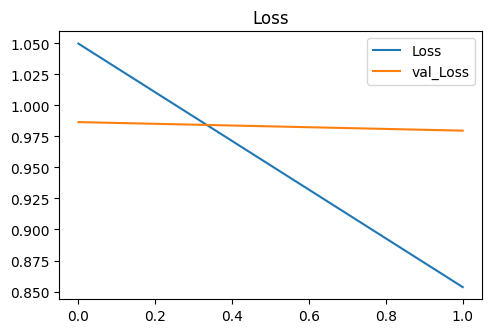

In [46]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss')
plt.legend()


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1000
           1       0.81      0.90      0.85      1000
           2       0.79      0.28      0.42      1000
           3       0.45      0.40      0.42      1000
           4       0.75      0.47      0.57      1000
           5       0.46      0.76      0.57      1000
           6       0.55      0.90      0.68      1000
           7       0.84      0.60      0.70      1000
           8       0.90      0.77      0.83      1000
           9       0.78      0.86      0.82      1000

    accuracy                           0.67     10000
   macro avg       0.70      0.67      0.66     10000
weighted avg       0.70      0.67      0.66     10000



## Evaluation and testing the model

In [49]:
evaluation = model.evaluate(X_test, y_test_categ)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.6686 - loss: 0.9746 - precision: 0.7608 - recall: 0.5910
Test Accuracy : 66.93%
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step


 Image 100 is [5]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
The model predict that image 100 is 3


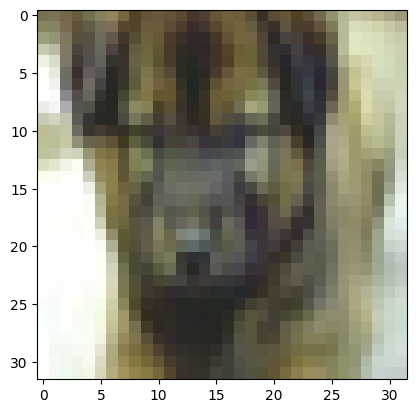

In [41]:
my_image = X_test[33]
plt.imshow(my_image)
print(f" Image 100 is {y_test[33]}")

pred_100 = np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predict that image 100 is {pred_100}")